In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lama_aesthetics

colors = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97',  '#474747', '#9e9e9e', '#9A607F']
lama_aesthetics.get_style("main")

In [6]:
human_data = {
    'Name': ['0c58df98-9f33-42a3-b817-2e48fe7b8441', 
             'a44f4bc7-57c5-4588-9f90-8e0188316d63',
             '3559a69b-eacf-4d24-aedd-5b408f04c5c5',
             '3ce06e21-8c4d-4255-8c3f-933031e0e021',
             'a10675fc-9395-4191-9546-8c78cebb4f3a',
             'bab8d4b6-34c0-4152-a5e1-55a8eb4f3969'],
    'Education': ['postdoc', 'postdoc', None, 'phd_student', 'phd_student', 'phd_student'],
    'Experience': ['more_5', 'more_5', None, 'more_5', '1_5', 'less_1'],
    'Nb_correct': [9, 8, 5, 4, 3, 2]
}

df_humans = pd.DataFrame(human_data)
correct_mf_count = 6  # AI score

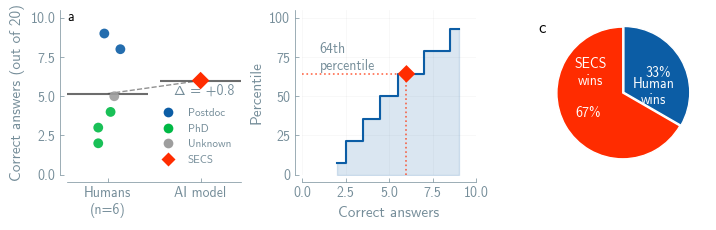

In [56]:
# Now create the figure with custom style
fig = plt.figure(figsize=(7.2, 2.4))  

# Panel A: Swarmplot with effect size
ax1 = plt.subplot(1, 3, 1)

# Prepare data
human_scores = df_humans['Nb_correct'].values
ai_score = correct_mf_count

# Define colors using the palette
edu_colors = {'postdoc': colors[0], 'phd_student': colors[1], None: colors[6]}
ai_color = colors[3]  # Red color from palette

# Plot humans with jitter
np.random.seed(42)
for i, (score, edu) in enumerate(zip(human_scores, df_humans['Education'])):
    x_jitter = np.random.uniform(-0.12, 0.12)
    ax1.scatter(x_jitter, score, color=edu_colors.get(edu, colors[6]), 
                s=50, alpha=0.9, edgecolors='none', zorder=5)

# Plot AI
ax1.scatter(0.8, ai_score, color=ai_color, s=80, marker='D', 
            edgecolors='none', zorder=10)

# Add mean lines
human_mean = human_scores.mean()
ax1.hlines(human_mean, -0.35, 0.35, colors=colors[5], linewidth=1.5, alpha=0.8)
ax1.hlines(ai_score, 0.45, 1.15, colors=colors[5], linewidth=1.5, alpha=0.8)

# Connect means with dashed line
ax1.plot([0, 0.8], [human_mean, ai_score], '--', color=colors[5], linewidth=1, alpha=0.6)

# Add effect size
effect_size = ai_score - human_mean
mid_y = (human_mean + ai_score) / 2

ax1.text(0.57, mid_y - 0.2, f'Δ = +{effect_size:.1f}',  va='center', ha='left')

# Styling
ax1.set_xlim(-0.35, 1.15)
ax1.set_ylim(0, 10.5)
ax1.set_xticks([0, 0.8])
ax1.set_xticklabels(['Humans\n(n=6)', 'AI model'])
ax1.set_ylabel('Correct answers (out of 20)')

# Adjust spine positions
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))

# Add panel label
ax1.text(-0.35, 10.5, 'a', fontweight='bold', va='top', color='black')

# Create custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], 
               markersize=7, markeredgecolor='none', label='Postdoc'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], 
               markersize=7, markeredgecolor='none', label='PhD'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[6], 
               markersize=7, markeredgecolor='none', label='Unknown'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor=ai_color, 
               markersize=7, markeredgecolor='none', label='SECS')
]
ax1.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=8)

# Panel B: Percentile ranking
ax2 = plt.subplot(1, 3, 2)

# Calculate cumulative distribution
all_scores = sorted(list(human_scores) + [ai_score])
n = len(all_scores)
percentiles = [(i + 0.5) / n * 100 for i in range(n)]

# Create step plot
ax2.step(all_scores, percentiles, where='mid', color=colors[0], linewidth=1.5)
ax2.fill_between(all_scores, 0, percentiles, step='mid', alpha=0.15, color=colors[0])

# Add AI point
ai_idx = all_scores.index(ai_score)
ai_percentile = percentiles[ai_idx]
ax2.scatter(ai_score, ai_percentile, color=ai_color, s=80, marker='D', 
            edgecolors='none', zorder=10)

# Add reference lines
ax2.plot([ai_score, ai_score], [0, ai_percentile], ':', color=ai_color, linewidth=1.2, alpha=0.7)
ax2.plot([0, ai_score], [ai_percentile, ai_percentile], ':', color=ai_color, linewidth=1.2, alpha=0.7)

# Styling
ax2.set_xlabel('Correct answers')
ax2.set_ylabel('Percentile')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.1, linewidth=0.5, color=colors[6])

# Adjust spine positions
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))

# Add annotation
ax2.text(ai_score - 5, ai_percentile + 20, f'{int(ai_percentile)}th\npercentile',  ha='left', va='top')

# Panel C: Pie chart
ax3 = plt.subplot(1, 3, 3)

# Calculate wins
wins = sum(human_scores < ai_score)
losses = sum(human_scores > ai_score)

# Create pie
colors_pie = [ai_color, colors[0]]
sizes = [wins, losses]
explode = (0.02, 0)

wedges, texts, autotexts = ax3.pie(sizes, colors=colors_pie, autopct='%1.0f%%',
                                    startangle=90, textprops={ 'color': 'white'},
                                    wedgeprops=dict(edgecolor='white', linewidth=1),
                                    explode=explode)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_weight('bold')

# Add labels
ax3.text(-0.5, 0.3, 'SECS\nwins', ha='center', va='center', color='white')
ax3.text(0.45, 00, 'Human\nwins',  ha='center', va='center', color='white')

# Add panel label
ax3.text(-1.3, 1.1, 'c', fontsize=12, fontweight='bold', va='top', color='black')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)